In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Read Data

In [101]:
data = pd.read_csv("E:/Study/Python/Assignments/machine-learning-ex1/ex1data2.txt", names=['Size','Beds','Price'])


In [102]:
data.head(5)

,Size,Beds,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
#See Data Statics

In [103]:
data.describe()

,Size,Beds,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [104]:
#Feature Normalization. 

In [105]:
data['Size'] = data['Size'].div(1000)

In [106]:
data['Price'] = data['Price'].div(100000)

In [107]:
#Check data after Normalization. 

In [108]:
data.describe()

,Size,Beds,Price
count,47.000000,47.000000,47.000000
mean,2.000681,3.170213,3.404127
std,0.794702,0.760982,1.250399
min,0.852000,1.000000,1.699000
25%,1.432000,3.000000,2.499000
50%,1.888000,3.000000,2.999000
75%,2.269000,4.000000,3.844500
max,4.478000,5.000000,6.999000


In [109]:
#Split X and Y

In [110]:
X = np.c_[np.ones(data.shape[0]),data.iloc[:,0:2]]
Y = np.c_[data.iloc[:,2]]

In [112]:
Y.shape

(47, 1)

In [114]:
X.shape

(47, 3)

In [115]:
#Analayz Data

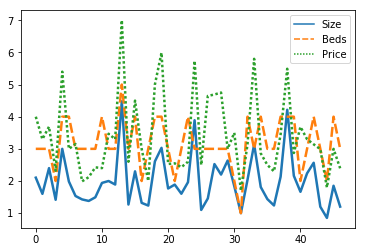

In [118]:
sns.lineplot(data=data, palette="tab10", linewidth=2.5)

In [119]:
m,n =data.shape

In [120]:
theta = pd.DataFrame([0,0,0])

In [122]:
X.shape

(47, 3)

In [ ]:
# Compute Cost

In [123]:
def Cost(X,y,theta):
    count = len(y)
    h = X.dot(theta)
    J =(1/(2*count))*(np.sum(np.square(h - y)))
    return(J)

In [124]:
Cost(X,Y,theta)

6.559154810645745

In [125]:
#Define Gradient function

In [127]:
def Gradient(X,Y,theta,alpha,iterations):
    m = len(Y)
    J_history = np.zeros(iterations)
    
    for iter in np.arange(iterations):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-Y))
        J_history[iter] = Cost(X,Y,theta)
    return(theta,J_history)
    

In [128]:
#Apply Gradient Descent

In [129]:
alpha = 0.01
iterations= 400
theta, costJ= Gradient(X,Y,theta,alpha,iterations)

In [130]:
print(theta)

          0
0  0.246226
1  1.121096
2  0.282589


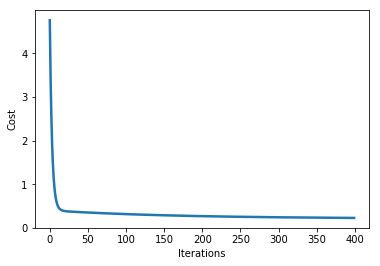

In [131]:
ax = sns.lineplot(data=costJ, palette="tab10", linewidth=2.5)
ax.set(xlabel='Iterations', ylabel='Cost')
plt.show()

In [134]:
data.head(5)

,Size,Beds,Price
0,2.104,3,3.999
1,1.600,3,3.299
2,2.400,3,3.690
3,1.416,2,2.320
4,3.000,4,5.399


In [135]:
#Fitted  Algoritmh parameters

In [136]:
theta

,0
0,0.246226
1,1.121096
2,0.282589


In [138]:
theta[0][0]

0.24622649612895017

In [139]:
#Predict price of 3 bed flat with 1650 area

In [141]:
yy = theta[0][0] + theta[0][1]*1.650+ theta[0][2]*3

In [142]:
#Actaul price

In [143]:
yy*100000

294380.19240554975